<h1>House Prices -Predictions </h1>

In [136]:
#Import libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [137]:
#Load data and get quick overview

test = pd.read_csv("test.csv", skipinitialspace=True)
train = pd.read_csv("train.csv", skipinitialspace=True)

In [138]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We're going to have to deal with the many NaN values that can be seen here, later.

In [139]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [140]:
train.shape

(1460, 81)

In [141]:
test.shape

(1459, 80)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Immediately we can see there are a large number of object data columns, which we will need to look at converting to numerical data later on, of keeping those features as part of our model.

<h3>Exploratory Data Analysis</h3>

We will start off by taking a closer look at our target variable, SalesPrice.

In [143]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the results are numerical and continuous, therefore this will be a regression problem.

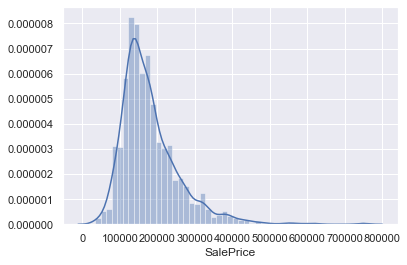

In [144]:
sns.distplot(train.SalePrice)

Saleprice is skewed to thr right so we will have to normalise this later on when we carry out pre-processing.

We will now look at some of the more "obvious" feature properties which we would assume impacted sale price greatly.

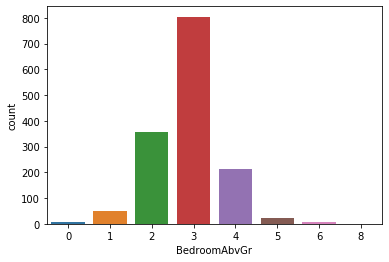

In [26]:
#Number of bedrooms above ground level
sns.countplot(train.BedroomAbvGr)

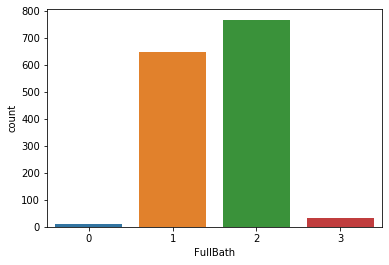

In [81]:
#Number of full bathrooms above ground
sns.countplot(train.FullBath)

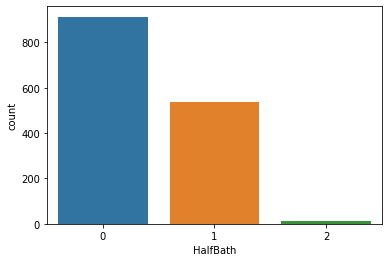

In [82]:
#Number of half bathrooms above ground
sns.countplot(train.HalfBath)

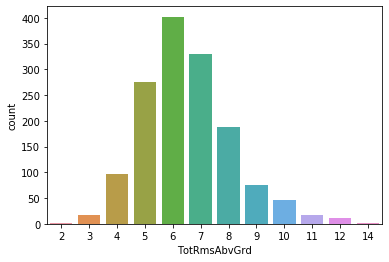

In [27]:
#Total number of rooms above ground level
sns.countplot(train.TotRmsAbvGrd)

In [145]:
#Neighborhood
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

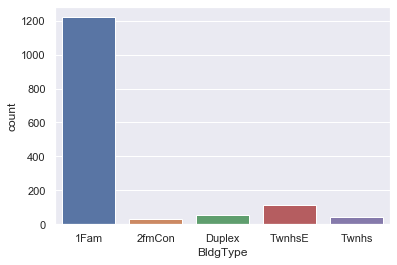

In [146]:
#Building Type
sns.countplot(train.BldgType)

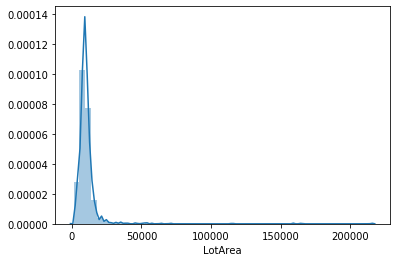

In [32]:
#Lot size in square feet
sns.distplot(train.LotArea)

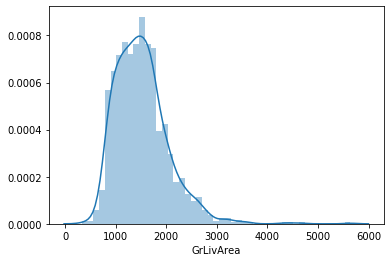

In [106]:
#Above ground living area square feet
sns.distplot(train.GrLivArea)

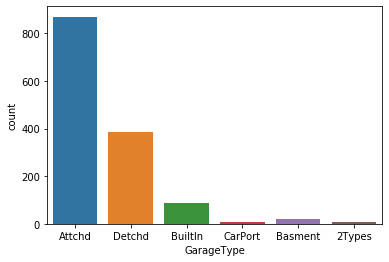

In [83]:
#Garage type
sns.countplot(train.GarageType)

But do these actually have as great of an impact as we initially thought? Let's check this using a couple of correlation maps.

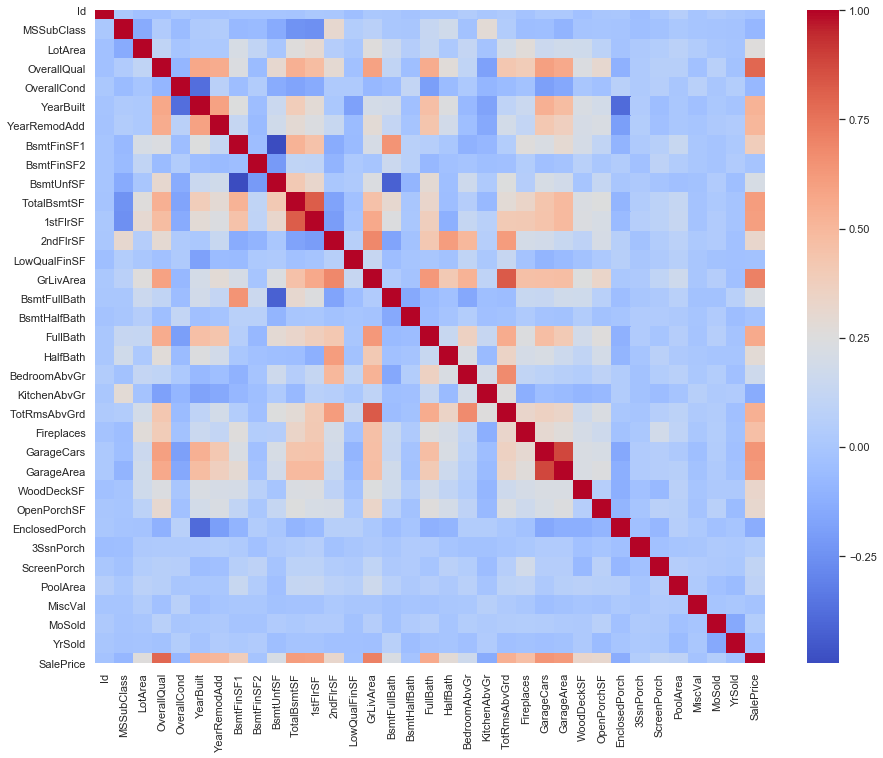

In [122]:
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(), cmap='coolwarm')

From above, we deduce there is a strong correlation between:<br><br>1stFlrSF & TotalBsmtSF (this is 2x2 square on the grid and indicates the presence of multicollinearity.) <br>GarageCars & GarageArea (2x2 square)<br>TotRmsAbvGrd and GrLivArea (1 square)<br>

Zooming in on this heat map

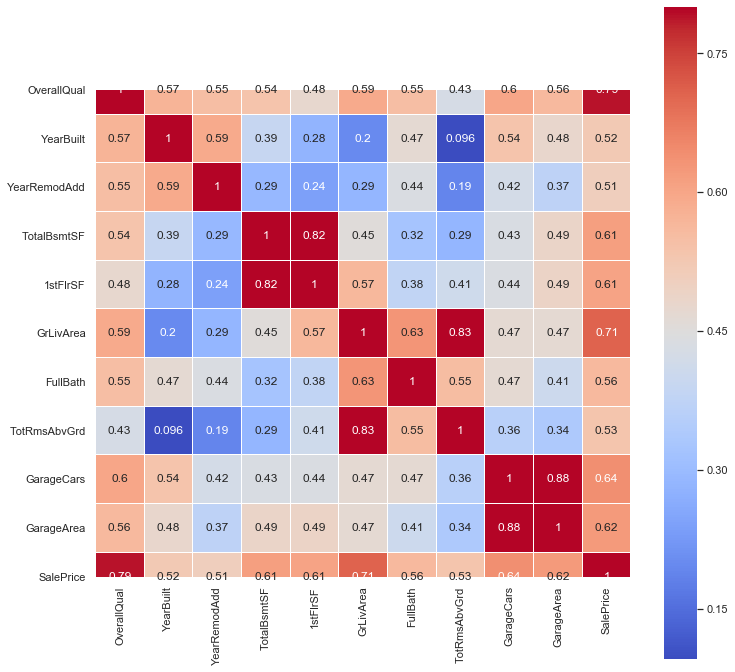

In [127]:
# Most correlated features with SalePrice
correlation = train.corr()
top_corr_features = correlation.index[abs(correlation["SalePrice"])>0.5]
plt.figure(figsize=(12,12))
g = sns.heatmap(train[top_corr_features].corr(),square=True,annot=True,vmax=0.8,cmap='coolwarm', linewidths=0.01)

There are strong correlations between:<br><br>
GarageArea and GarageCars<br>
TotalBsmtSF and 1stFlrSF 

In [121]:
#View this info in a list form. Listing all features with correlation with SalePrice

correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

We can see from the above, the factors most strongly correlated with SalePrice are: 
OverallQual
GrLivArea
GarageCars,
GarageArea,
1stFlrSF, TotalBsmtSF, not we initally thought! 

So let's take a look at some of these in more detail.

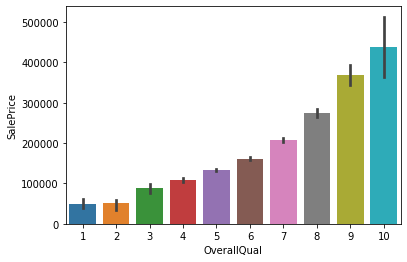

In [98]:
sns.barplot(x = train.OverallQual, y= train.SalePrice)

This would make sense, with the higher the quality rating of a house, the higher the value at point of sale.

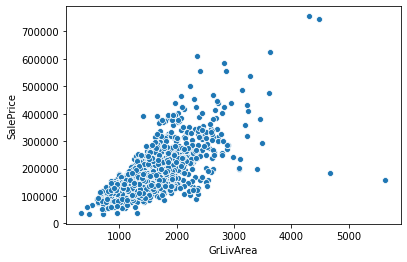

In [103]:
sns.scatterplot(x = train.GrLivArea, y= train.SalePrice)

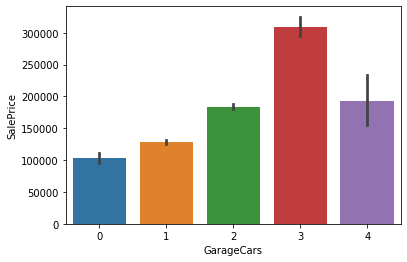

In [102]:
sns.barplot(x = train.GarageCars, y= train.SalePrice)

We can also look at these features' correlation through a pair plot, a combined scatter plot of these features.

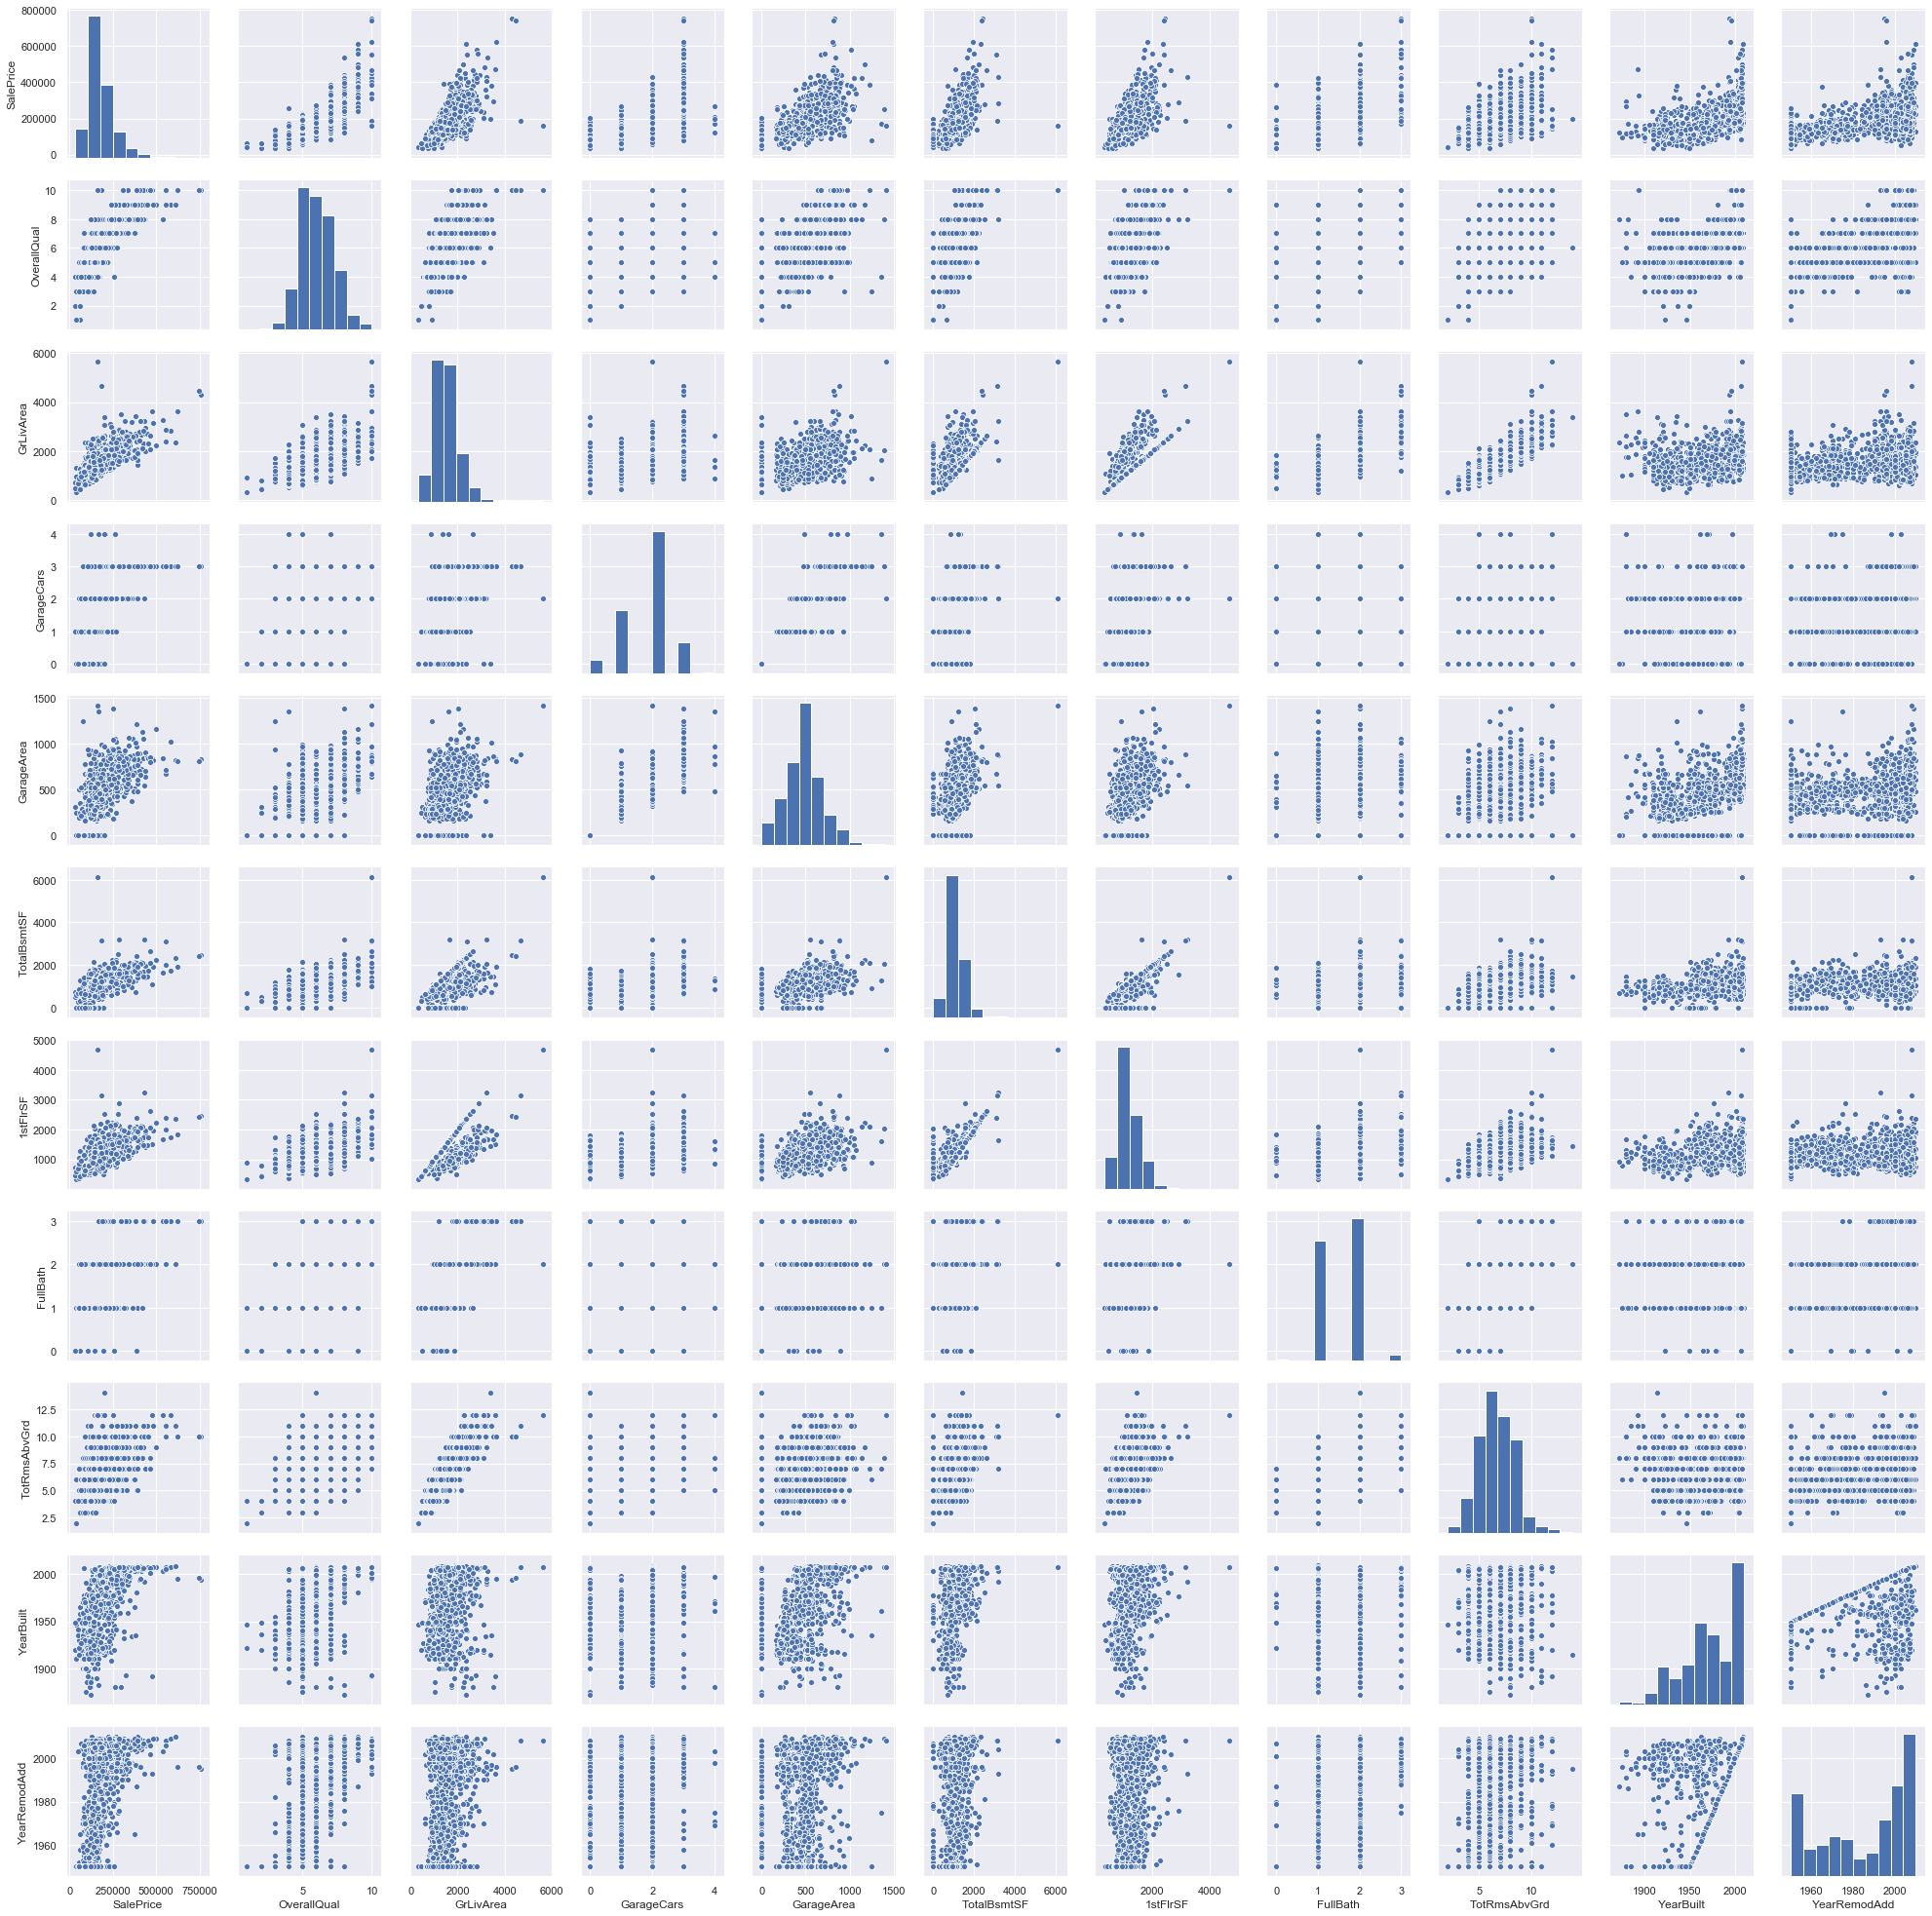

In [128]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
        'TotRmsAbvGrd','YearBuilt', 'YearRemodAdd']
sns.pairplot(train[cols], height = 2.5)

<h2> Preprocessing</h2>

<h3>Outliers</h3>

From the above charts, we can see there are a number of outliers in SalePrice vs GrLivArea, TotalBsmtSF and 1stFlSF. Looking at these closer:

Text(0.5, 1.0, 'GrLivArea x SalePrice')

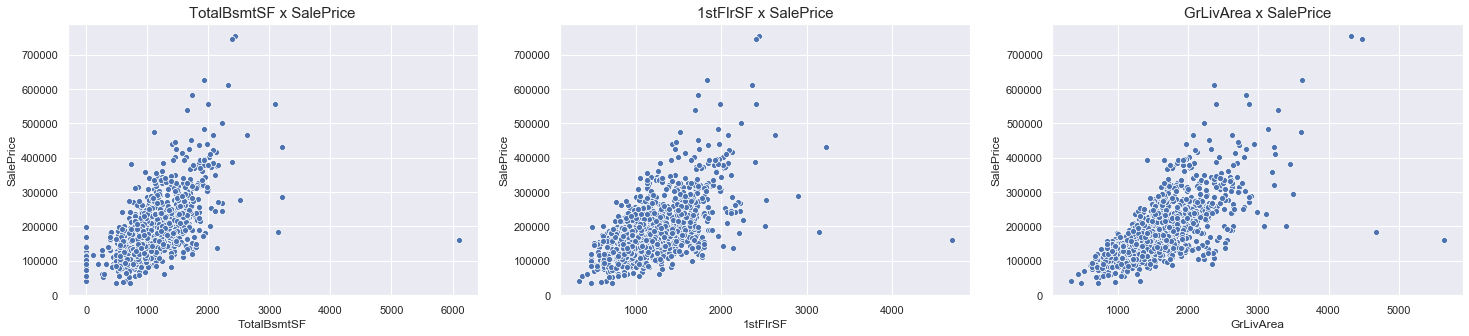

In [147]:
plt.figure(figsize=(25,5))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x=train.TotalBsmtSF, y=train.SalePrice)
plt.title('TotalBsmtSF x SalePrice', size=15)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x=train['1stFlrSF'], y=train.SalePrice)
plt.title('1stFlrSF x SalePrice', size=15)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = train.GrLivArea, y=train.SalePrice)
plt.title('GrLivArea x SalePrice', size=15)

Let's remove these outliers. In order to count how many datapoints we remove, we will look at the shape of the dataset before removal and post removal.

In [148]:
train.shape

(1460, 81)

In [149]:
train.drop(train[train['TotalBsmtSF'] > 5000].index, inplace=True)

train.drop(train[train['1stFlrSF'] > 4000].index,inplace=True)

train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index, inplace = True)

In [150]:
train.shape

(1458, 81)

So only 2 datapoints were removed as outliers, meaning that out of the 4 points we could see on the charts above, the features shared the same outliers.

<h3>Feature Engineering</h3>

It will make more sense if we combine the Total Square feet of the house into one feature, the total porch sqft into one and the total sq ft of the property combined.

In [161]:
train['HouseSqFt'] = train.TotalBsmtSF + train['1stFlrSF'] + train['2ndFlrSF']

train['PorchSqFt'] = train.WoodDeckSF + train.OpenPorchSF + train.EnclosedPorch + train['3SsnPorch'] 
+ train.ScreenPorch

train['TotalSqFt'] = train.HouseSqFt + train.PorchSqFt + train.GarageArea + train.PoolArea


In [162]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3>Missing values</h3>

In [93]:
cols_miss_vals = [col for col in train.columns if train[col].isnull().any()]
cols_miss_vals

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [111]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(20) #As we know from above there are 19 columns with missing values

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We know from the documentation that: <br><br> PoolQC, NA = No Pool <br> Misc Feature, NA = None <br> Alley, NA = no access <br> Fence, NA = No fence <br> FireplaceQU, NA = No fireplace <br> LotFrontage, NA = no value inputted <br> GarageCond, NA = No garage <br> GarageType, NA = no garage <br> GarageYrBlt, NA = no value inputted, but we can deduce that these data lines have no garage, as there are 81 missing istances as per all the other garage missing features <br> GarageFinish, NA = No garage <br> GarageQual, NA = No garage <br> BsmtExposure, NA = no basement <br> BsmtFinType2, NA = no basement <br> BsmtFinType1, NA = no basement <br> BsmtCond, NA = no basement <br> BsmtQual, NA = no basement <br> MasVnrArea, None = None <br> MasVnrType, None = None <br> Electrical, NA = no info given on this feature, but there is only 1 misisng value<br>

We will therefore impute the value 0 or 'none' into the features above where NA = None. 

In [113]:
#Impute relevant value
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageType', 'GarageFinish', 
            'GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond', 'BsmtQual' , 'MasVnrType'):
    train[col] = train[col].fillna('None')
    
for col in ('LotFrontage', 'GarageYrBlt', 'MasVnrArea'):
    train[col] = train[col].fillna('0')

In [116]:
#Do the same for the test data. We dont want to merge the two files together as if we used mean for example to 
#impute values, it would result in data leakage. We can use a pipeline to do this all at once, which I will edit
#this code at a later date to try

cols_miss_vals_test = [col for col in test.columns if test[col].isnull().any()]
cols_miss_vals_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

There are 33 columns with missing values.

In [117]:
total_test = test.isnull().sum().sort_values(ascending = False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_values_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_values_test.head(33) #As we know from above there are 33 columns with missing values

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [ ]:
#Impute relevant value

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageType', 'GarageFinish', 
            'GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond', 'BsmtQual' , 'MasVnrType',
           'Exterior2nd' ):
    test[col] = test[col].fillna('None')
    
for col in ('LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2',
            'BsmtFinSF1' 'TotalBsmtSF', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna('0')
    
MSZoning, Utilities, Functional, Exterior1st, SaleType, KitchenQual, 

<h3>Normalisation</h3>

<h2>Modelling </h2>
The below can all be added into a pipeline together

In [89]:
#Define labels and features for the train and test datasets
labels = train.SalePrice
features = train[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
test_features = test[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

#Split train data set, into test(validation) and training data
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [67]:
#Create and fit model using the training data split
model = RandomForestRegressor(n_estimators = 200, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

<h3> Local validation </h3>

In [75]:
#Test accuracy score using validation data split
model.score(X_valid, y_valid)

0.9373433321087253

<h3>Cross Validation</h3>

<h3>Predictions</h3>

In [76]:
#Make predictions on unseen data (the test data set)
predictions = model.predict(test_features)
predictions

array([121234.5  , 153696.25 , 183953.925, ..., 158452.76 , 140291.5  ,
       227588.6  ])

In [77]:
#Save results into csv for kaggle submission
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': predictions})
output.to_csv('submission.csv', index=False)